#### 무게를 찾기
- 목표 : 농어(Perch) 길이 피쳐를사용해서 무게를 예측하기
- 데이터셋 : fish.csv
- 피쳐/속성 : Length
- 타겟/라벨 : Weight

[1] 데이터 준비 및 피쳐/타겟 분석

In [270]:
import pandas as pd
import matplotlib.pyplot as plt

file_name = r'C:\VSCode\KDT\머신러닝\DAY01\fish.csv'
Fish_df = pd.read_csv(file_name,usecols = [0,1,2])
Fish_df

,Species,Weight,Length
0,Bream,242.0,25.4
1,Bream,290.0,26.3
2,Bream,340.0,26.5
3,Bream,363.0,29.0
4,Bream,430.0,29.0
...,...,...,...
154,Smelt,12.2,12.2
155,Smelt,13.4,12.4
156,Smelt,12.2,13.0
157,Smelt,19.7,14.3


In [271]:
mask = (Fish_df['Species'] == 'Perch')
Perch_df = Fish_df[mask]
Perch_df

,Species,Weight,Length
72,Perch,5.9,8.4
73,Perch,32.0,13.7
74,Perch,40.0,15.0
75,Perch,51.5,16.2
76,Perch,70.0,17.4
77,Perch,100.0,18.0
78,Perch,78.0,18.7
79,Perch,80.0,19.0
80,Perch,85.0,19.6
81,Perch,85.0,20.0


In [272]:
Perch_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 56 entries, 72 to 127
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Species  56 non-null     object 
 1   Weight   56 non-null     float64
 2   Length   56 non-null     float64
dtypes: float64(2), object(1)
memory usage: 1.8+ KB


In [273]:
Perch_df = Perch_df.drop('Species',axis='columns').copy()

In [274]:
Perch_df.reset_index(drop=True)

,Weight,Length
0,5.9,8.4
1,32.0,13.7
2,40.0,15.0
3,51.5,16.2
4,70.0,17.4
5,100.0,18.0
6,78.0,18.7
7,80.0,19.0
8,85.0,19.6
9,85.0,20.0


In [275]:
Perch_df.corr()

,Weight,Length
Weight,1.000000,0.958656
Length,0.958656,1.000000


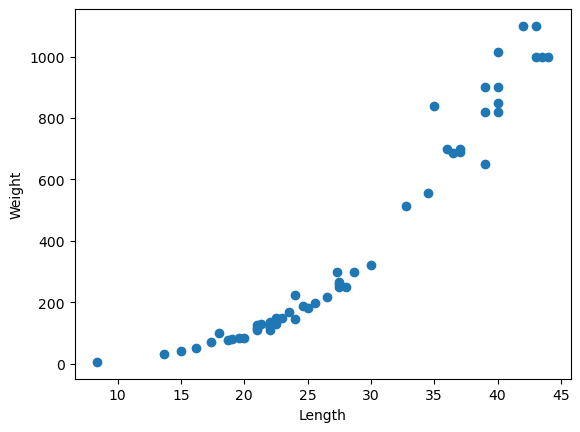

In [276]:
plt.scatter(Perch_df['Length'],Perch_df['Weight'])
plt.xlabel('Length')
plt.ylabel('Weight')
plt.show()


[2] 학습 준비
- 학습 알고리즘 : KNN Regressor
- 피쳐 스케일링
- 학습용/테스트용 데이터셋 분리

In [277]:
# 무게는 수치화 되어 있어서 안 해도 됨.
features = Perch_df[['Length']]
target = Perch_df['Weight']

print(f'Features => {features.shape},{features.ndim}D')
print(f'target => {target.shape},{target.ndim}D')

Features => (56, 1),2D
target => (56,),1D


-[2-2] 학습용 & 테스트용 데이터셋 분리
* 전체 데이터셋 => 학습용:테스트용 => 본인의 선택(80:20,70:30)
* 회귀 데이터셋 => 데이터셋 구성 요소에 대한 비율 고려X

In [278]:
from sklearn.model_selection import train_test_split

In [279]:
X_train, X_test, y_train, y_test = train_test_split(features,
                                                    target,
                                                    test_size=0.3,
                                                    random_state=10)

In [280]:
print(f'X_train : {X_train.shape},{X_train.ndim}D')
print(f'y_train : {y_train.shape},{y_train.ndim}D')

print(f'X_test : {X_test.shape},{X_test.ndim}D')
print(f'y_test : {y_test.shape},{y_test.ndim}D')

X_train : (39, 1),2D
y_train : (39,),1D
X_test : (17, 1),2D
y_test : (17,),1D


In [323]:
X_train=X_train.reset_index(drop=True)
y_train=y_train.reset_index(drop=True)

X_test=X_test.reset_index(drop=True)
y_test=y_test.reset_index(drop=True)

- [2-3] 피쳐 스케일링

In [281]:
from sklearn.preprocessing import MinMaxScaler

In [282]:
# 스케일러 인스턴스 생성
mmScaler = MinMaxScaler()

In [283]:
# 스케일러에 데이터셋 전용의 속성값 설정
mmScaler.fit(X_train)

MinMaxScaler()

In [284]:
mmScaler.min_, mmScaler.scale_, mmScaler.data_min_, mmScaler.data_max_

(array([-0.23595506]), array([0.02808989]), array([8.4]), array([44.]))

In [285]:
# 학습용, 테스트용 데이터셋 스케일링 진행
X_train_scaled = mmScaler.transform(X_train)
X_test_scaled = mmScaler.transform(X_test)

In [286]:
# mmScaler.fit_transform => mmScaler을 쓰기위해 fit과 transform을 나눠서 봐야됨.

[3] 학습 진행

In [287]:
X = [[0],[1],[2],[3]]
y = [0,0,1,1]

from sklearn.neighbors import KNeighborsRegressor
neigh = KNeighborsRegressor(n_neighbors=3)
#                       n_neighbors =  근처에 있는 이웃을 몇개로 잡을거냐
neigh.fit(X,y)


KNeighborsRegressor(n_neighbors=3)

In [288]:
print(neigh.predict([[1.5]]))

[0.33333333]


In [289]:
distance, index = neigh.kneighbors([[1.5]])
#              이웃값을 거리값과 인덱스로 나타내주는 매개 변수!!!!!!!!

print(distance,index)
# distance와 index는 2차원 형태로 나옴!

index.reshape(-1) # 2차원으로 되어있어서 차원 변경해야됨.

[[0.5 0.5 1.5]] [[1 2 0]]


array([1, 2, 0], dtype=int64)

In [290]:
# for idx in index.tolist():
#     print(idx,y[idx])

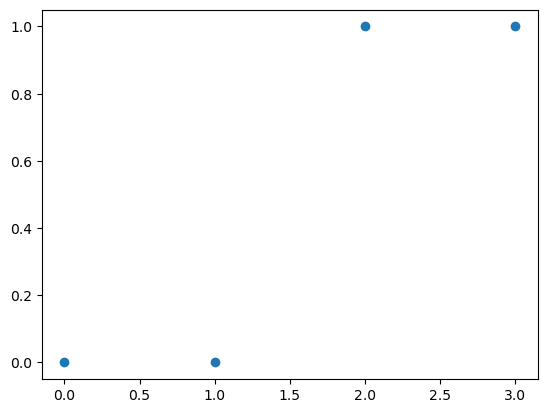

In [291]:
plt.scatter([0,1,2,3],[0,0,1,1])
plt.plot()
plt.show()

In [292]:
#### 본 학습!!

# 학습 모델 인스턴스 생성
model = KNeighborsRegressor()

# 학습용 데이터셋으로 학습 진행
model.fit(X_train_scaled,y_train)

KNeighborsRegressor()

In [293]:
# 모델 파라미터 => 학습 후 즉, fit() 실행 후 설정되는 매개변수
model.n_features_in_, model.n_samples_fit_, model.effective_metric_,model.effective_metric_params_

(1, 39, 'euclidean', {})

[4] 최적의 K 찾기

In [294]:
scores={}
for k in range(1,model.n_samples_fit_+1):
    # 최근접 이웃의 갯수 설정 <== 모델 성능 좌우 : 하이퍼파라미터
    model.n_neighbors = k

    # 성능 평가
    score = model.score(X_test_scaled,y_test)

    scores[k]=score


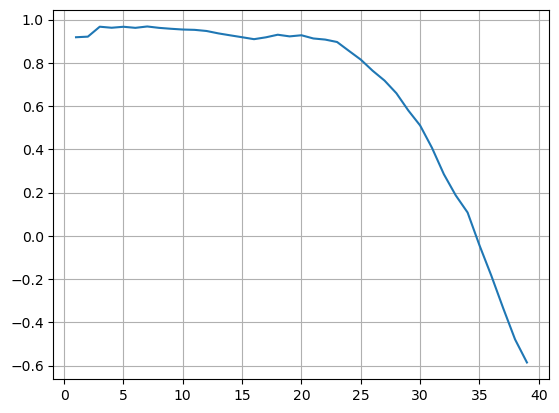

In [295]:
plt.plot(list(scores.keys()),list(scores.values()))
plt.grid()
plt.show()

In [296]:
# 가장 높은 지점 뽑는 법 잘 알아두기!!
#                                 x=(key, value)
best_k = sorted(scores.items(), key=lambda x:x[1],reverse=True)[0][0]
best_k
# => 최고 성능의 k값

7

In [297]:
# 모델에 적용 => n_neighbors에 설정
model.n_neighbors = best_k

[5] 새로운 데이터의 무게 예측하기

In [301]:
new_lengh=input('농어 길이 : ')
print(f'new_lengh : {new_lengh}')

new_lengh : 44


In [303]:
# 2D , 스케일링 적용
# 스케일링에 적용할때 데이터의 형태는 데이터프레임의 형태여야함!!!!
dataDF = pd.DataFrame([[new_lengh]],columns=['Length'])
dataDF

,Length
0,44


In [306]:
# 피쳐 스케일링
data_scaled = mmScaler.transform(dataDF)
data_scaled

array([[1.]])

In [307]:
# 예측
model.predict(data_scaled)

array([981.42857143])

In [308]:
# 값이 981나온걸 볼려면 kneighbors 찍어보면 됨.
distance, index = model.kneighbors(data_scaled)
print(distance,index,sep='\n')

[[0.         0.01404494 0.02808989 0.02808989 0.05617978 0.11235955
  0.11235955]]
[[28 24 27  0 12  9  4]]


In [309]:
X_train.iloc[index.reshape(-1)]

,Length
127,44.0
126,43.5
124,43.0
125,43.0
123,42.0
119,40.0
122,40.0


In [318]:
X_train_scaled[[28,24,27,0,12,  9,  4]]

array([[1.        ],
       [0.98595506],
       [0.97191011],
       [0.97191011],
       [0.94382022],
       [0.88764045],
       [0.88764045]])

In [319]:
y_train.index

Index([125, 117,  82, 110, 122,  90,  76,  73,  84, 119,  94, 103, 123,  91,
       111,  77,  85,  86, 118, 105,  96,  83, 113,  88, 126, 112, 114, 124,
       127,  80, 120, 101,  97, 100, 121,  72,  87, 108,  81],
      dtype='int64')

In [320]:
y_train

125    1100.0
117     650.0
82      110.0
110     556.0
122     820.0
90      110.0
76       70.0
73       32.0
84      125.0
119     850.0
94      150.0
103     260.0
123    1100.0
91      130.0
111     840.0
77      100.0
85      130.0
86      120.0
118     820.0
105     250.0
96      225.0
83      115.0
113     700.0
88      130.0
126    1000.0
112     685.0
114     700.0
124    1000.0
127    1000.0
80       85.0
120     900.0
101     218.0
97      145.0
100     197.0
121    1015.0
72        5.9
87      120.0
108     320.0
81       85.0
Name: Weight, dtype: float64

In [321]:
# x는 데이터 프레임 y는 시리즈 => 차원이 달라서 그런건가?
# X 데이터 스케일링 거치면 array형태로 변환됨.
# 

In [328]:
y_train[index.reshape(-1)].sum()/model.n_neighbors #(6)

981.4285714285714

KNN Regressor 문제점/단점

In [331]:
# 임의의 데이터
new_lengh = 4

# 2D , 스케일링 적용
# 스케일링에 적용할때 데이터의 형태는 데이터프레임의 형태여야함!!!!
dataDF = pd.DataFrame([[new_lengh]],columns=['Length'])
# 피쳐 스케일링
data_scaled = mmScaler.transform(dataDF)

In [332]:
# 예측
model.predict(data_scaled)

array([70.41428571])

=> 학습 데이터셋의 범위를 벗어난 더 큰 데이터, 더 작은 데이터의 경우  
정확한 예측 불가!!